In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas
import trueskill
import random
import time
import math

In [8]:
choices=open("all_judgments.txt")
table=[]
for l in choices.readlines():
    left,right,choice=l[:-1].split(",")
    left=left.split("/")[-1]
    right=right.split("/")[-1]
    l=[left,right,choice]
    table.append(l)
table=table[1:]
# table=pandas.DataFrame(table,columns=["left","right","choice"])

In [9]:
len(table)

48172

In [15]:
# pics=list(table["left"].unique())+list(table["right"].unique())
# pics=set(pics)
# df=pandas.DataFrame(pics,columns=["Name"])
# df["mu"]=25
# df["sigma"]=25/3
# df

,Name,mu,sigma
0,team 13 (sai ying pun)_cheung ka fai (jason)_4...,25,8.333333
1,team 4 (north point)_kwan sheung lai (harry)_1...,25,8.333333
2,team 2 (tsuen wan)_motooka riria _ gurung shir...,25,8.333333
3,team 6 (kowloon tong)_wong ho yeung (brian) _ ...,25,8.333333
4,team 13 (sai ying pun)_wan hing yin (james)_2.jpg,25,8.333333
...,...,...,...
3025,team 13 (sai ying pun)_thadani simran sanjay_5...,25,8.333333
3026,team 1 (kwun tong)_shiu ming chi (simon)_54.jpg,25,8.333333
3027,team 12 (whampoa)_vansh manoj jain_2.jpg,25,8.333333
3028,team 16 (tin hau)_cheung cheuk man (chevy)_139...,25,8.333333


In [37]:
# node=pandas.DataFrame()
df=pandas.read_csv("info_images.csv" )
df["Name"]=df["Name"].apply(lambda x : x.lower())


(array([ 3.,  1.,  2.,  1.,  0.,  5.,  1.,  3.,  2.,  3., 13., 13., 10.,
         8., 17., 10., 10., 15., 19., 21., 15., 22., 17., 28., 36., 31.,
        34., 39., 34., 41., 36., 40., 34., 38., 40., 54., 47., 56., 65.,
        60., 55., 54., 53., 55., 50., 66., 65., 52., 53., 49., 55., 67.,
        62., 64., 49., 54., 62., 55., 59., 48., 48., 67., 44., 59., 42.,
        53., 44., 55., 56., 51., 41., 35., 33., 40., 27., 35., 19., 21.,
        29., 22., 16., 19., 26., 19., 10., 12.,  9., 10.,  7.,  9.,  5.,
         3.,  2.,  2.,  3.,  1.,  1.,  2.,  1.,  1.]),
 array([ 456.91666667,  467.69583333,  478.475     ,  489.25416667,
         500.03333333,  510.8125    ,  521.59166667,  532.37083333,
         543.15      ,  553.92916667,  564.70833333,  575.4875    ,
         586.26666667,  597.04583333,  607.825     ,  618.60416667,
         629.38333333,  640.1625    ,  650.94166667,  661.72083333,
         672.5       ,  683.27916667,  694.05833333,  704.8375    ,
         715.61666667,  72

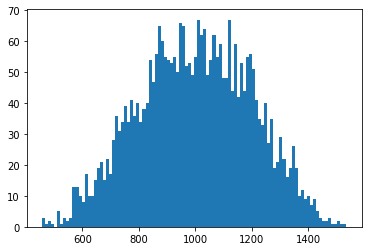

In [21]:
plt.hist(df["mean_elo_rating"], bins=100)

In [4]:
df=pandas.read_csv("trueskill_full_100.csv" ) # read data of 100 generated record
df.head()


,Unnamed: 0,Name,DateTimeOriginal,GPSLatitude,GPSLongitude,picture_id,nb_judgments,mean_elo_rating,st_elo_rating,elo_reduced,...,rank_36,mu_37,sigma_37,rank_37,mu_38,sigma_38,rank_38,mu_39,sigma_39,rank_39
0,0,team 1 (kwun tong)_fung hon yin (jeffrey)_13.jpg,2020:11:08 12:11:19,22.309619,114.219422,5,30,777.500000,51.147736,-1.123292,...,11.433739,15,1.901318,9.296047,17,1.941077,11.176768,20,2.216371,13.350888
1,1,team 1 (kwun tong)_fung hon yin (jeffrey)_22.jpg,2020:11:08 12:11:49,22.309742,114.219100,14,28,779.000000,55.471532,-1.115720,...,11.744847,13,1.803326,7.590023,17,1.828922,11.513233,26,2.707932,17.876205
2,2,team 1 (kwun tong)_fung hon yin (jeffrey)_26.jpg,2020:11:08 12:12:02,22.310008,114.219033,18,42,634.666667,57.783819,-1.844387,...,17.525428,26,2.112827,19.661518,25,2.334103,17.997691,27,2.406333,19.781000
3,3,team 1 (kwun tong)_fung hon yin (jeffrey)_27.jpg,2020:11:08 12:12:08,22.310092,114.219008,19,32,556.250000,52.464923,-2.240274,...,20.399625,28,2.444181,20.667456,26,2.570005,18.289986,26,2.360076,18.919771
4,4,team 1 (kwun tong)_fung hon yin (jeffrey)_37.jpg,2020:11:08 12:09:30,22.309886,114.219269,29,34,747.333333,87.183540,-1.275589,...,14.062194,14,1.636696,9.089913,19,1.832130,13.503609,19,2.172619,12.482143


# Elo ranking stimulation

In [ ]:
name_to_idx={}
df=pandas.read_csv("info_images.csv" )
df["Name"]=df["Name"].apply(lambda x : x.lower())
def prob(r1, r2):
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (r1 - r2) / 400))
for i in range(len(df)):
    name_to_idx[df.iloc[i]["Name"]]=i
for i in range(100): # stimulate matches for 100 times
    random.shuffle(table)
    df[f"elo_{i}"]=1000 # init elo
    for cp in table:
        x=cp[0]
        y=cp[1]
        res=int(cp[2])
        row_x=name_to_idx[x]
        row_y=name_to_idx[y]
        elo_x=df.iloc[row_x][f"elo_{i}"].item()
        elo_y=df.iloc[row_y][f"elo_{i}"].item()
        Px=prob(elo_y, elo_x)
        Py=prob(elo_x, elo_y)
        if res==0:
            elo_x=elo_x+32*(1-Px)
            elo_y=elo_y+32*(0-Px)
        else:
            elo_x=elo_x+32*(0-Px)
            elo_y=elo_y+32*(1-Px)
        df.at[row_x, f'elo_{i}']=elo_x
        df.at[row_y, f'elo_{i}']=elo_y  
    df.to_csv("elo100_full.csv")

# Trueskill stimulation

In [5]:
env=trueskill.TrueSkill(draw_probability=0)
num_trail=100
name_to_idx={}
for i in range(len(df)):
    name_to_idx[df.iloc[i]["Name"]]=i
# Randomly selected some images to visualize their change of ranking
# name=df.Name.tolist()
# random.shuffle(name)
# selected=name[:50]
# record={}
# fig,ax=plt.subplots( 5,2,figsize=(10,25))
# K=30

for i in range(num_trail):
    random.shuffle(table)
    df[f"mu_{i}"]=25
    df[f"sigma_{i}"]=25/3
    start=time.time()
    for cp in table:
        x=cp[0]
        y=cp[1]
        res=int(cp[2])
        row_x=name_to_idx[x]
        row_y=name_to_idx[y]

        # df.loc[df["Name"]==x , "num_cp"]+=1
        # df.loc[df["Name"]==y , "num_cp"]+=1

        mu_x=df.iloc[row_x][f"mu_{i}"].item()
        mu_y=df.iloc[row_y][f"mu_{i}"].item()
        sigma_x=df.iloc[row_x][f"sigma_{i}"].item()
        sigma_y=df.iloc[row_y][f"sigma_{i}"].item()
        # print(mu_x,mu_y,sigma_x,sigma_y)
        Rx=trueskill.Rating(mu_x,sigma_x)
        Ry=trueskill.Rating(mu_y,sigma_y)
        # Px=probability(Ry , Rx)
        # Py=probability(Rx , Ry)
        # print("Rx =", round(Px, 6)," Ry =", round(Py, 6))

        if res ==0:
            # print("X win")
            # Rx=Rx + K * (1 - Px)
            # Ry=Ry + K * (0 - Py)
            # =========================
            result=trueskill.rate_1vs1(Rx,Ry,env=env)
            mu_x=result[0].mu
            mu_y=result[1].mu
            sigma_x=result[0].sigma
            sigma_y=result[1].sigma
            # print(result)
            
        else:
            # print("Y win")
            # print(res == 1)
            # Rx=Rx + K * (0 - Px)
            # Ry=Ry + K * (1 - Py)  
            # =========================
            result=trueskill.rate_1vs1(Ry,Rx,env=env)
            mu_x=result[1].mu
            mu_y=result[0].mu
            sigma_x=result[1].sigma
            sigma_y=result[0].sigma
            # print(result)
        df.at[row_x , f"mu_{i}"]=mu_x
        df.at[row_x , f"sigma_{i}"]=sigma_x
        df.at[row_y , f"mu_{i}"]=mu_y
        df.at[row_y , f"sigma_{i}"]=sigma_y
        # if x in selected:
        #     rank=mu_x-3*sigma_x
        #     try:
        #         record[x].append(rank)
        #     except:
        #         record[x]=[rank]
        
        # if y in selected:
        #     rank=mu_y-3*sigma_y
        #     try:
        #         record[y].append(rank)
        #     except:
        #         record[y]=[rank]
    # print(record)
    # axe=ax[i%5][i//5]
    # for i2 , rec in record.items():
    #     x=np.arange(len(rec))
    #     axe.plot(x, rec )   
    # axe.set_title(f"plot of trueskil change_{i}")
    # record={}
    # break

        # print(df.at[row_x,f"mu_{i}"],df.at[row_y,f"mu_{i}"])
        # print(df.at[row_x,f"sigma_{i}"],df.at[row_y,f"sigma_{i}"])
        # print("Updated Rx =", round(Rx, 6)," Ry =", round(Ry, 6))
        # df.at[row_x , f"elo_{i}"]=Rx
        # df.at[row_y , f"elo_{i}"]=Ry
    k=3
    df[f"rank_{i}"]=df[f"mu_{i}"]-k*df[f"sigma_{i}"]
    finish=time.time()
    print(f"round {i} finished, time:" , (finish-start)/60, "mins")
df.to_csv("trueskill_full_100.csv")


round 40 finished, time: 1.2824493328730264 mins
round 41 finished, time: 0.8399174849192301 mins
round 42 finished, time: 0.8135777354240418 mins
round 43 finished, time: 0.8096663157145182 mins
round 44 finished, time: 0.817787496248881 mins
round 45 finished, time: 0.8286446849505107 mins
round 46 finished, time: 0.9304020126660665 mins
round 47 finished, time: 0.9845069169998169 mins
round 48 finished, time: 0.9723916331926982 mins
round 49 finished, time: 0.9861706852912903 mins
round 50 finished, time: 0.9811662316322327 mins
round 51 finished, time: 0.9761514504750569 mins
round 52 finished, time: 1.033169110616048 mins
round 53 finished, time: 1.1668209552764892 mins
round 54 finished, time: 1.2756796518961588 mins
round 55 finished, time: 1.0252187848091125 mins
round 56 finished, time: 1.0209746996561686 mins
round 57 finished, time: 1.0560935497283936 mins
round 58 finished, time: 1.3142988165219625 mins
round 59 finished, time: 1.0550158619880676 mins
round 60 finished, tim

/var/folders/m5/3gd7jsw91dqdft60pl5ysy2m0000gn/T/ipykernel_4414/3779219227.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"sigma_{i}"]=25/3
/var/folders/m5/3gd7jsw91dqdft60pl5ysy2m0000gn/T/ipykernel_4414/3779219227.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"rank_{i}"]=df[f"mu_{i}"]-k*df[f"sigma_{i}"]
/var/folders/m5/3gd7jsw91dqdft60pl5ysy2m0000gn/T/ipykernel_4414/3779219227.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

round 72 finished, time: 1.2586412668228149 mins
round 73 finished, time: 1.317985967795054 mins
round 74 finished, time: 1.2973690509796143 mins
round 75 finished, time: 1.3025612513224283 mins
round 76 finished, time: 1.3493601322174071 mins
round 77 finished, time: 1.7950310627619426 mins
round 78 finished, time: 1.2367416183153788 mins
round 79 finished, time: 1.2551242351531982 mins
round 80 finished, time: 1.2142921288808186 mins
round 81 finished, time: 1.220983103911082 mins
round 82 finished, time: 1.227327036857605 mins
round 83 finished, time: 1.2491310993830362 mins
round 84 finished, time: 1.2707104802131652 mins
round 85 finished, time: 1.272992237408956 mins
round 86 finished, time: 1.3129444678624471 mins
round 87 finished, time: 1.2958431879679362 mins
round 88 finished, time: 1.308022133509318 mins
round 89 finished, time: 1.341878883043925 mins
round 90 finished, time: 1.3304152806599936 mins
round 91 finished, time: 1.3405259172121684 mins
round 92 finished, time: 1

In [6]:
df.head()

,Unnamed: 0,Name,DateTimeOriginal,GPSLatitude,GPSLongitude,picture_id,nb_judgments,mean_elo_rating,st_elo_rating,elo_reduced,...,rank_96,mu_97,sigma_97,rank_97,mu_98,sigma_98,rank_98,mu_99,sigma_99,rank_99
0,0,team 1 (kwun tong)_fung hon yin (jeffrey)_13.jpg,2020:11:08 12:11:19,22.309619,114.219422,5,30,777.500000,51.147736,-1.123292,...,5.878848,19,2.053352,12.839944,16,2.014656,9.956031,17,1.936854,11.189437
1,1,team 1 (kwun tong)_fung hon yin (jeffrey)_22.jpg,2020:11:08 12:11:49,22.309742,114.219100,14,28,779.000000,55.471532,-1.115720,...,10.336247,18,1.838723,12.483832,17,1.901455,11.295636,16,1.799853,10.600440
2,2,team 1 (kwun tong)_fung hon yin (jeffrey)_26.jpg,2020:11:08 12:12:02,22.310008,114.219033,18,42,634.666667,57.783819,-1.844387,...,19.115616,23,2.271739,16.184784,24,1.958385,18.124845,22,2.144307,15.567079
3,3,team 1 (kwun tong)_fung hon yin (jeffrey)_27.jpg,2020:11:08 12:12:08,22.310092,114.219008,19,32,556.250000,52.464923,-2.240274,...,19.536361,28,2.638583,20.084252,27,2.579430,19.261711,27,2.697930,18.906211
4,4,team 1 (kwun tong)_fung hon yin (jeffrey)_37.jpg,2020:11:08 12:09:30,22.309886,114.219269,29,34,747.333333,87.183540,-1.275589,...,10.528544,17,1.808352,11.574944,18,1.760652,12.718043,17,1.772905,11.681285


In [2]:
# fig,ax=plt.subplots( 1,1,figsize=(10,10))
# for i , rec in record.items():
#     x=np.arange(len(rec))
#     ax.plot(x, rec )   
# ax.set_title("plot of trueskil change")
# plt.legend()
# fig, ax = plt.subplots(figsize=(5, 2.7) )
# def set_axes(axes, xlabel, ylabel, xscale, yscale, legend):
#     axes.set_xlabel(xlabel)
#     axes.set_ylabel(ylabel)
#     axes.set_xscale(xscale)
#     axes.set_yscale(yscale)
#     # axes.set_xlim(xlim)
#     # axes.set_ylim(ylim)
#     axes.legend(legend)
#     axes.grid()
#     return axes
# def add(fig,axe,x,y,X,Y):
#     n=len(y)
#     x=[x]*n
#     # fmts=('-', 'm--')
#     print(x,y)
#     for i,(a,b) in enumerate(zip(x,y)):
#         X[i].append(a)
#         Y[i].append(b)
#     axe.cla()
#     for (x,y) in zip(X,Y):
#         axe.plot(x,y)
#     axe=set_axes(axe,xlabel="epoch",ylabel=None ,xscale='linear', yscale='linear',legend=[i for i in range(100)])
#     display.display(fig)
#     display.clear_output(wait=True)
#     return X,Y
# figsize=(10,10)
# fig,axe=plt.subplots(1,1,figsize=figsize)
# epoch=0
# X_rec=[[],[]]
# Y_rec=[[],[]]
# temp=[]
# for key, value in record.items():
#     temp.append(value)
#     X_rec,Y_rec=add(fig,axe,epoch+1,value,X_rec,Y_rec)
#     epoch+=1


(array([ 12.,  70., 294., 235., 130., 141., 158., 166., 155., 164., 156.,
        165., 182., 180., 136., 167., 132.,  94.,  90.,  62.,  52.,  43.,
         16.,  16.,   5.,   2.,   4.,   2.,   0.,   1.]),
 array([-1.79376682, -1.61705325, -1.44033968, -1.26362611, -1.08691254,
        -0.91019897, -0.7334854 , -0.55677183, -0.38005826, -0.20334469,
        -0.02663112,  0.15008245,  0.32679602,  0.50350959,  0.68022316,
         0.85693673,  1.0336503 ,  1.21036387,  1.38707744,  1.56379101,
         1.74050458,  1.91721815,  2.09393172,  2.27064529,  2.44735886,
         2.62407243,  2.800786  ,  2.97749957,  3.15421314,  3.33092671,
         3.50764028]),
 <BarContainer object of 30 artists>)

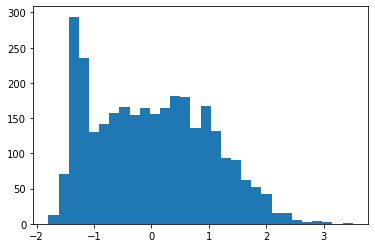

In [42]:
df["norm_0"]=(df["rank_0"]-df["rank_0"].mean())/(df["rank_0"].std())
plt.hist(df["norm_0"],bins=30)

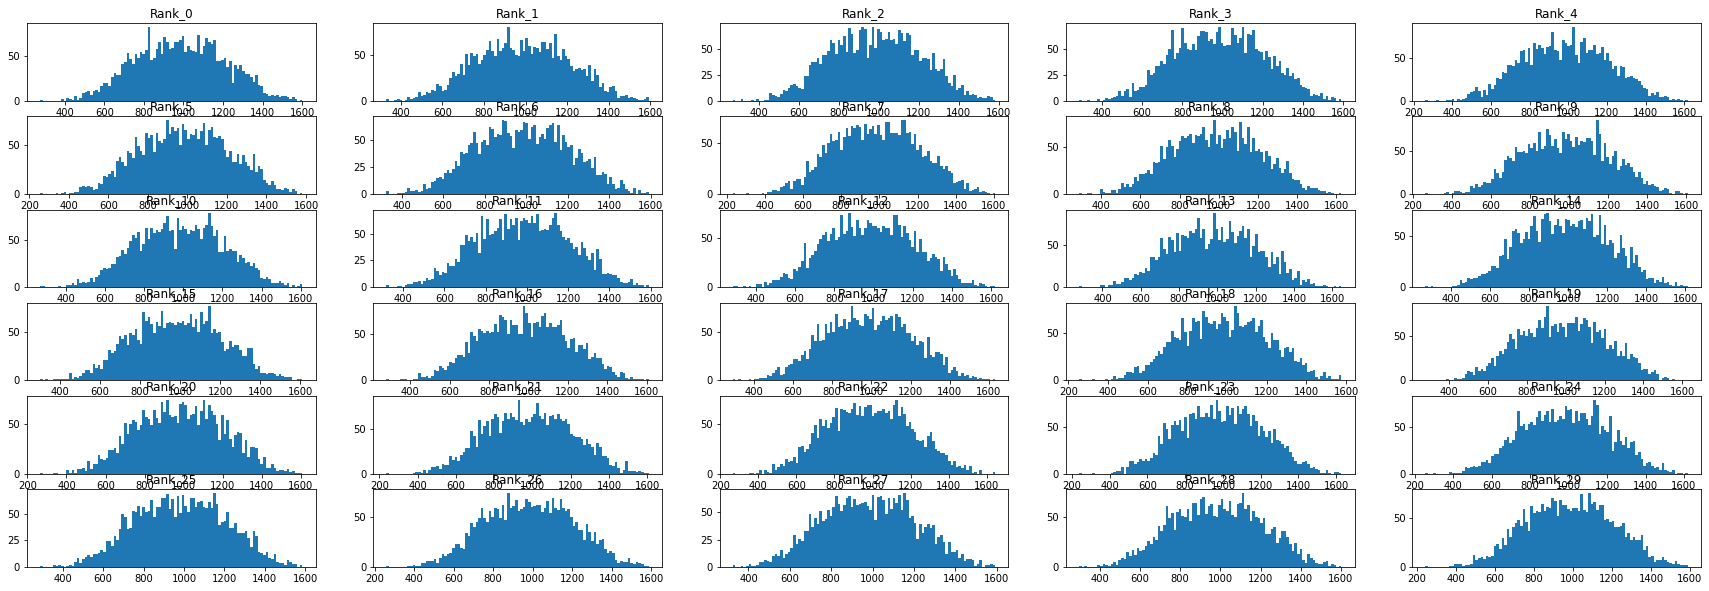

In [35]:
fig,axes = plt.subplots(6,5 , figsize=(30,10))

for i in range(30):
    row=i//5
    col=i%5
    ax=axes[row,col]
    ax.hist(df[f"rank_{i}"],bins=100)
    ax.title.set_text(f"Rank_{i}")


In [2]:
df=pandas.read_csv("elo100_full.csv")

In [3]:
col_to_extrect=["Name"]
for i in range(100):
    col_to_extrect.append(f"elo_{i}")
# ranks=df[["Name" , "rank_0" , "rank_1" , "rank_2" , "rank_3" , "rank_4" , "rank_5" , "rank_6" , "rank_7" , "rank_8" , "rank_9", "rank_10", "rank_11", "rank_12", "rank_13", "rank_14", "rank_15"]]
ranks=df[col_to_extrect]

# ranks=df[["Name" , "rank_0" , "rank_1" ]]


In [4]:
ranks

,Name,elo_0,elo_1,elo_2,elo_3,elo_4,elo_5,elo_6,elo_7,elo_8,...,elo_90,elo_91,elo_92,elo_93,elo_94,elo_95,elo_96,elo_97,elo_98,elo_99
0,team 1 (kwun tong)_fung hon yin (jeffrey)_13.jpg,1181,1165,1150,1139,1155,1153,1151,1142,1154,...,1147,1161,1154,1156,1114,1139,1170,1126,1151,1155
1,team 1 (kwun tong)_fung hon yin (jeffrey)_22.jpg,1160,1105,1149,1146,1168,1162,1158,1132,1152,...,1143,1138,1170,1141,1170,1124,1126,1174,1168,1145
2,team 1 (kwun tong)_fung hon yin (jeffrey)_26.jpg,1514,1462,1518,1514,1462,1499,1464,1539,1452,...,1458,1539,1554,1479,1485,1488,1481,1506,1510,1555
3,team 1 (kwun tong)_fung hon yin (jeffrey)_27.jpg,1369,1349,1354,1347,1369,1335,1366,1353,1358,...,1349,1335,1359,1398,1362,1346,1356,1368,1368,1356
4,team 1 (kwun tong)_fung hon yin (jeffrey)_37.jpg,1302,1306,1335,1282,1331,1306,1294,1315,1301,...,1306,1330,1286,1298,1308,1283,1271,1391,1310,1297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,team 9 (yau ma tei)_sze cheuk fung (bosco)_77.jpg,1048,1086,1049,1064,1059,1055,1039,1056,1054,...,1078,1064,1079,1050,1065,1072,1085,1043,1072,1068
3026,team 9 (yau ma tei)_sze cheuk fung (bosco)_79.jpg,981,958,942,982,975,1001,991,975,1002,...,979,960,976,978,1012,973,949,970,970,991
3027,team 9 (yau ma tei)_sze cheuk fung (bosco)_86.jpg,1223,1217,1228,1195,1202,1186,1185,1191,1196,...,1194,1196,1199,1187,1215,1222,1186,1173,1209,1207
3028,team 9 (yau ma tei)_sze cheuk fung (bosco)_89.jpg,1147,1131,1131,1147,1137,1118,1139,1129,1119,...,1134,1140,1132,1122,1126,1146,1138,1133,1140,1119


In [9]:
ranks.to_csv("trueskill100_rank_only.csv",index=False)

# Turn elo into bins (for classification)

In [12]:
df2= pandas.read_csv("trueskill100_with_bin.csv")
# df2["mean_rank"]=df2.iloc[:,1:].mean(axis=1)
# df2["cls"]=pandas.cut(df2["mean_rank"], 25)
# df2=ranks
# for i in range(100):
    # df2[f"norm_{i}"]=(df2[f"rank_{i}"]-df2[f"rank_{i}"].mean())/(df2[f"rank_{i}"].std())
    # df2[f"cls_{i}"]=pandas.qcut(df["mean_rank"],q=num_bin,labels=[i for i in range(num_bin)])
# df2.iloc[:,-16:].head()
df2["mean_rank"]=df2.iloc[:,102:202].mean(axis=1)
df2["cls"], bins=pandas.cut(df2["mean_rank"], 30, retbins=True)
bins_extended=bins
bins_extended[0]+=-1
bins_extended[-1]+=1
for i in range(100):
    df2[f"bin_{i}"]=pandas.cut(df2[f"norm_{i}"], bins_extended, labels=[i for i in range(30)])
df2.head()


,Unnamed: 0,Name,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,...,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,mean_rank,cls
0,0,team 1 (kwun tong)_fung hon yin (jeffrey)_13.jpg,13.140454,10.215156,10.318273,10.351047,12.259653,7.470909,10.386204,10.104975,...,14,17,17,17,12,18,16,17,1.053610,"(1.05, 1.212]"
1,1,team 1 (kwun tong)_fung hon yin (jeffrey)_22.jpg,13.368624,10.639402,11.276056,12.937888,12.438843,11.636492,10.024045,12.527703,...,18,18,17,17,16,18,17,16,1.185007,"(1.05, 1.212]"
2,2,team 1 (kwun tong)_fung hon yin (jeffrey)_26.jpg,18.081727,17.225246,15.684079,14.744929,16.289438,17.246992,15.962562,16.211663,...,20,24,23,22,24,21,23,21,1.908076,"(1.859, 2.021]"
3,3,team 1 (kwun tong)_fung hon yin (jeffrey)_27.jpg,20.437248,21.046416,20.388121,17.993420,21.229758,19.539444,17.556245,19.513754,...,25,26,27,25,24,25,24,24,2.355320,"(2.344, 2.506]"
4,4,team 1 (kwun tong)_fung hon yin (jeffrey)_37.jpg,12.746223,11.751519,12.811000,11.577215,13.868987,10.090926,12.722897,11.733053,...,17,18,17,19,16,17,18,17,1.288254,"(1.212, 1.374]"


/userhome/cs/chan0305/ENTER/envs/walkability/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


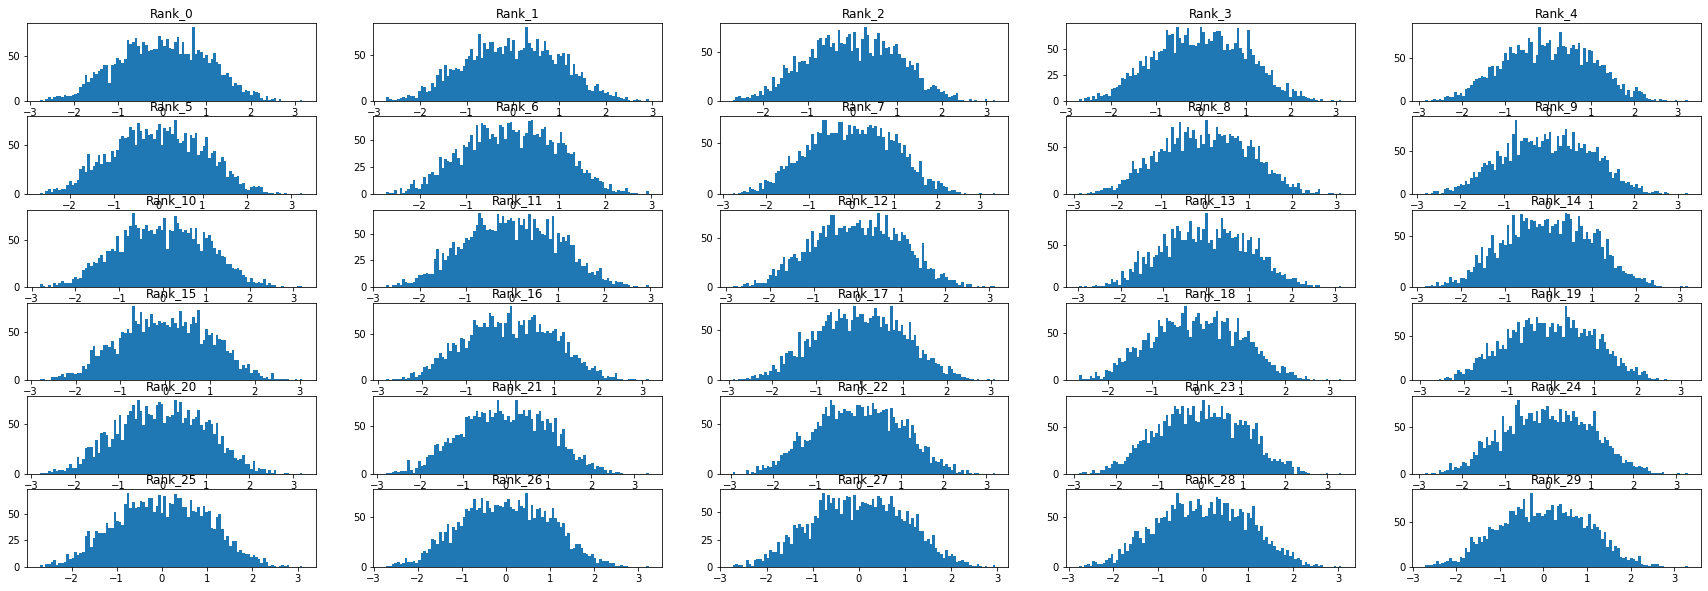

In [5]:
# df=pandas.read_csv('trueskill100_rank_only.csv')
df=ranks
norm_metadata=pandas.DataFrame(columns=[])
fig,axes = plt.subplots(6,5 , figsize=(30,10))
for i in range(100):
    df[f"norm_{i}"]=-(df[f"elo_{i}"]-df[f"elo_{i}"].mean())/(df[f"elo_{i}"].std())
#     print(f"norm_{i}")
#     print(df[f"norm_{i}"].describe())
    norm_metadata[f"norm_{i}"]=df[f"norm_{i}"].describe()
for i in range(30):
    row=i//5
    col=i%5
    ax=axes[row,col]
    ax.hist(df[f"norm_{i}"],bins=100)
    ax.title.set_text(f"Rank_{i}")
norm_metadata.to_csv("elo_meta.csv")

In [19]:
lower=-3.5
upper=3.5
bin_num=100
difference=(upper-lower)/bin_num
bins=[lower]
for i in range(bin_num):
    bins.append(lower+(i+1)*difference)
for i in range(100):
    df[f"bin_{i}"]=pandas.cut(df[f"norm_{i}"], bins, labels=[i for i in range(bin_num)])
# df["mean_rank"]=df.iloc[:,101:201].mean(axis=1)
# df.head()
df.to_csv("elo100_with_bins_inverse.csv")

In [7]:
# df2=pandas.read_csv("trueskill100_with_bin.csv", index_col=0)
# df2.head()

,Name,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,...,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,diff
0,team 1 (kwun tong)_fung hon yin (jeffrey)_13.jpg,13.140454,10.215156,10.318273,10.351047,12.259653,7.470909,10.386204,10.104975,13.321993,...,16.0,14.0,16.0,17.0,17.0,12.0,18.0,16.0,17.0,-0.021661
1,team 1 (kwun tong)_fung hon yin (jeffrey)_22.jpg,13.368624,10.639402,11.276056,12.937888,12.438843,11.636492,10.024045,12.527703,11.607833,...,16.0,18.0,18.0,17.0,16.0,16.0,18.0,17.0,16.0,-0.021661
2,team 1 (kwun tong)_fung hon yin (jeffrey)_26.jpg,18.081727,17.225246,15.684079,14.744929,16.289438,17.246992,15.962562,16.211663,15.349513,...,21.0,20.0,24.0,22.0,21.0,24.0,21.0,23.0,21.0,-0.021661
3,team 1 (kwun tong)_fung hon yin (jeffrey)_27.jpg,20.437248,21.046416,20.388121,17.993420,21.229758,19.539444,17.556245,19.513754,18.552417,...,23.0,24.0,25.0,26.0,25.0,24.0,25.0,24.0,24.0,-0.021661
4,team 1 (kwun tong)_fung hon yin (jeffrey)_37.jpg,12.746223,11.751519,12.811000,11.577215,13.868987,10.090926,12.722897,11.733053,12.772239,...,18.0,17.0,17.0,17.0,19.0,16.0,17.0,18.0,17.0,-0.021661


# Generate Elo distribution for each image

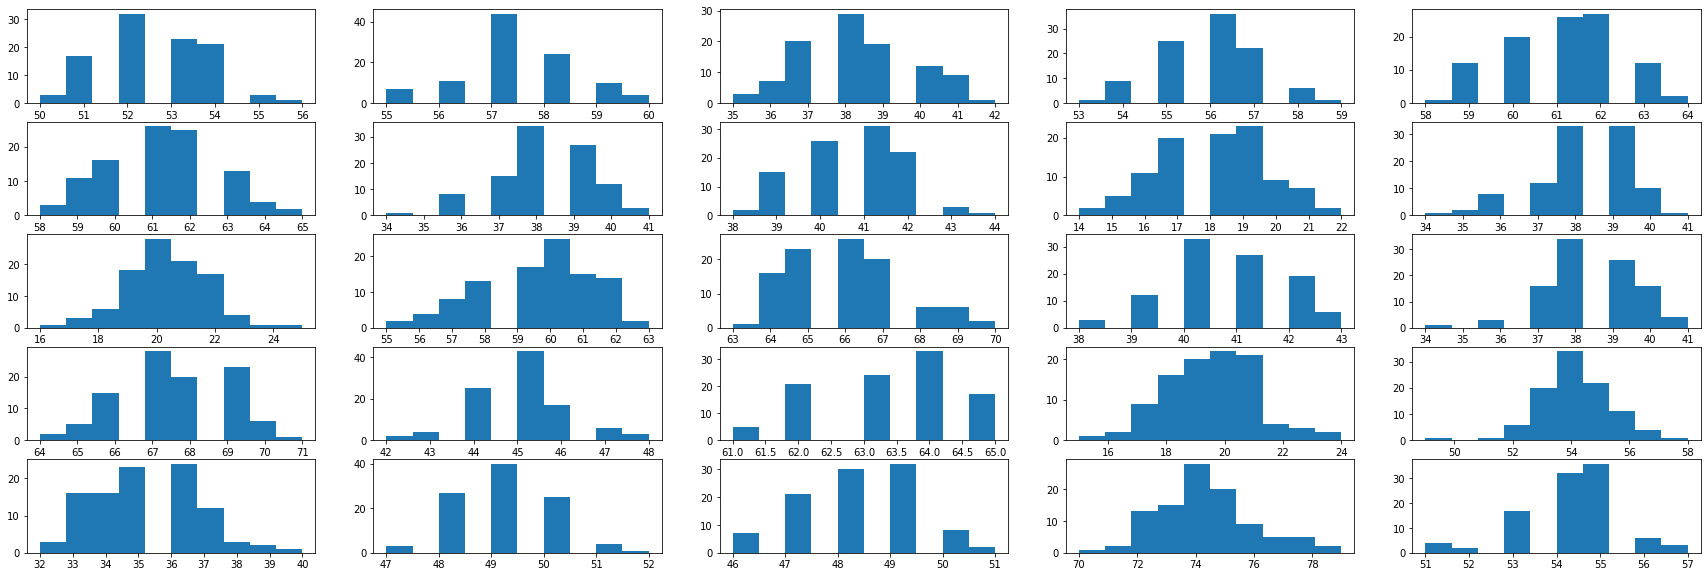

In [20]:
fig,axes = plt.subplots(5,5 , figsize=(30,10))
for i in range(25):
    row=i//5
    col=i%5
    ax=axes[row,col]
    rec=df.iloc[i+random.randint(0,3000),-100:]
    # print(len(rec))
    ax.hist(rec, bins=10)
    # ax.title.set_text(f"Rank_{i}")


In [4]:
# _, bins=pandas.cut(df2["mean_rank"], 30, retbins=True)
# mean_bins=[]
# for i in range(bin_num):
#     mean=(bins[i]+bins[i+1])/2
#     mean_bins.append(mean)
# # print(bins, len(mean_bins))
# for i in range(25):
#     sum=0
#     # print(sum)
#     for j in range(100):
#         # print(i,j)
#         b_num= df.at[i, f"bin_{j}"]
# #         print(b_num)
#         if str(b_num) == "nan":
#             continue
#         # print(b_num)
#         # print(f"bin{j}: num={b_num}, val={mean_bins[b_num]}")
#         sum+=mean_bins[b_num]
#     # print(sum)
#     print("avg after bin: ", sum/100)
#     print("difference with mean: ", df.at[i, "mean_rank"]-sum/100)
    # df2["diff"]=df2.at[i, "mean_rank"]-sum/100

In [33]:
df2['diff'].describe()

count    3.030000e+03
mean    -2.166088e-02
std      3.470020e-18
min     -2.166088e-02
25%     -2.166088e-02
50%     -2.166088e-02
75%     -2.166088e-02
max     -2.166088e-02
Name: diff, dtype: float64

In [24]:
df2.to_csv("trueskill100_with_bin.csv")